In [135]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.9.2
2.9.0


In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [137]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils

import numpy as np

In [138]:
data_path = os.path.join("datasets")

In [139]:
def load_data(filename, data_path=data_path):
    csv_path = os.path.join(data_path, filename)
    df = pd.read_csv(csv_path, sep = ",")
    return df


In [140]:
train_data = load_data("train.csv")
test_data = load_data("test.csv")

In [141]:
y = train_data["label"].to_numpy()
X = train_data.drop(["label"], axis=1).to_numpy()

In [142]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [144]:
X_train.shape

(37800, 784)

In [145]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0].shape)

nb_classes = len(np.unique(y_train))
n_samples = X_train.shape[0]

(37800, 28, 28, 1)
(4200, 28, 28, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([3724, 4213, 3757, 3845, 3675, 3456, 3735, 3963, 3660, 3772]))
(28, 28, 1)


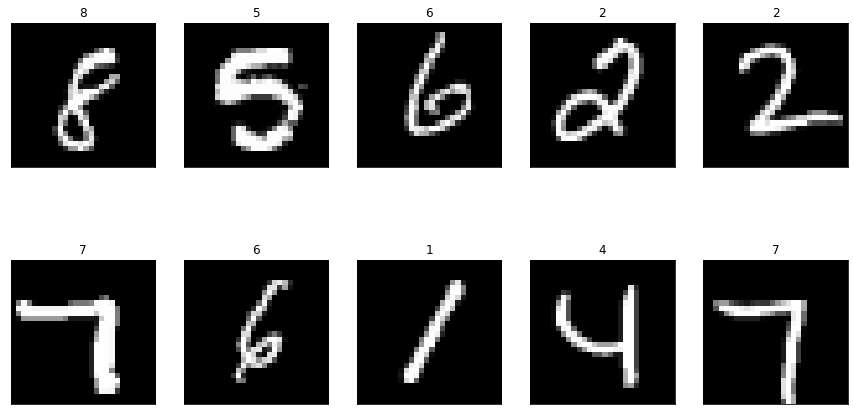

In [85]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y_train, X_train, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

In [86]:
# normalize inputs from 0-255 to 0.0-1.0

X_train = X_train/255
X_test = X_test/255
test_data = test_data/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
test_data = np_utils.to_categorical(test_data)

num_classes = y_test.shape[1]

X_train[0].shape

(28, 28, 1)

In [87]:
np.max(X_train[0])

1.0

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import History

In [89]:
history_1 = History()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [90]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping, history_1])
model.evaluate(X_test, y_test)

Epoch 1/100
886/886 [==============================] - 18s 19ms/step - loss: 0.2553 - accuracy: 0.9215 - val_loss: 0.0722 - val_accuracy: 0.9796
Epoch 2/100
886/886 [==============================] - 18s 20ms/step - loss: 0.0992 - accuracy: 0.9693 - val_loss: 0.0577 - val_accuracy: 0.9840
Epoch 3/100
886/886 [==============================] - 18s 20ms/step - loss: 0.0724 - accuracy: 0.9777 - val_loss: 0.0536 - val_accuracy: 0.9849
Epoch 4/100
886/886 [==============================] - 17s 19ms/step - loss: 0.0556 - accuracy: 0.9825 - val_loss: 0.0542 - val_accuracy: 0.9865
Epoch 5/100
886/886 [==============================] - 17s 19ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0567 - val_accuracy: 0.9860
Epoch 6/100
886/886 [==============================] - 18s 21ms/step - loss: 0.0430 - accuracy: 0.9857 - val_loss: 0.0506 - val_accuracy: 0.9867
Epoch 7/100
886/886 [==============================] - 19s 22ms/step - loss: 0.0356 - accuracy: 0.9884 - val_loss: 0.0493 - val_ac

[0.045179665088653564, 0.9895238280296326]

In [150]:
test_data = load_data("test.csv")

In [151]:
test_data = test_data.to_numpy()

In [152]:
test_data.shape

(28000, 784)

In [153]:
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

In [154]:
test_data.shape

(28000, 28, 28, 1)

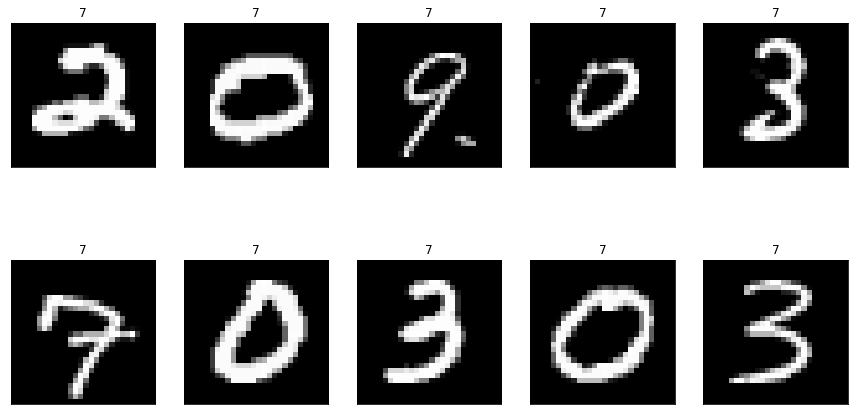

In [155]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for image, ax in zip(test_data, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

In [130]:
# normalize inputs from 0-255 to 0.0-1.0
test_data = test_data/255

# one hot encode outputs
#test_data = np_utils.to_categorical(test_data)

In [131]:
test_data.shape

(28000, 28, 28, 1)

In [162]:
predictions = np.argmax(model.predict(test_data), axis = 1)

875/875 [==============================] - 4s 5ms/step


In [184]:
predictions_df = pd.DataFrame(data = predictions)
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv(path_or_buf = "submission/submission.csv", header=["Label"], index=True, index_label="ImageId")